# Personality Dataset



In [1]:
#Created by Jesús García García - Master´s Degree in Big Data Analytics UEM

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys._enablelegacywindowsfsencoding()
%matplotlib inline

#read dataset
dataset_path = r"C:\mbti_1.csv"
df = pd.read_csv(dataset_path,  error_bad_lines=False, encoding='cp1252')
#create new columns
df.columns = ['label', 'text']

##START Preprocessing texts##

#delete strange characters from Dataset (some of them won´t be deleted because its are useful to guess personality)
df['text'] = df['text'].str.replace(r"[/%_*\"\'@$,]", '')

##END Preprocessing texts##

#print head of Dataset
df.head()

b'Skipping line 171: expected 2 fields, saw 23\nSkipping line 6103: expected 2 fields, saw 4\n'


,label,text
0,ENTP,Im finding the lack of me in these posts very ...
1,INTP,Good one https:www.youtube.comwatch?v=fHiG...
2,INTJ,Dear INTP I enjoyed our conversation the oth...
3,ENTJ,Youre fired.|||Thats another silly misconcepti...
4,INTJ,1837 .|||Science is not perfect. No scientist...


In [3]:
#word counts
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
#words per comment (we are going to analyse last 100 messages)
df['words_comment'] = df['text'].apply(lambda x: len(x.split())/100)
#variance of word counts
df['variance_word_counts'] = df['text'].apply(lambda x: var_row(x))
#print head of Dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8672 entries, 0 to 8671
Data columns (total 4 columns):
label                   8672 non-null object
text                    8672 non-null object
words_comment           8672 non-null float64
variance_word_counts    8672 non-null float64
dtypes: float64(2), object(2)
memory usage: 271.1+ KB


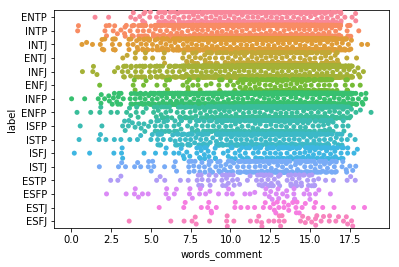

In [4]:
#print swarmplot
sns.swarmplot(x="words_comment", y="label", data=df)

In [5]:
df.groupby('label').agg({'label':'count'})

,label
label,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1469


In [6]:
#Create new df aux
dfaux=df.copy()

#Delete not useful labels because data are not relevant
dfaux.drop(dfaux[dfaux.label == 'ESFJ'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESFP'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESTJ'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESTP'].index, inplace=True)
#http per comment
dfaux['http_comment'] = dfaux['text'].apply(lambda x: x.count('http')/100)
#points per comment
dfaux['points_comment'] = dfaux['text'].apply(lambda x: x.count('...')/100)
#question per comment
dfaux['question_comment'] = dfaux['text'].apply(lambda x: x.count('?')/100)
#exclamation per comment
dfaux['exclamation_comment'] = dfaux['text'].apply(lambda x: x.count('!')/100)
#caret per comment
dfaux['caret_comment'] = dfaux['text'].apply(lambda x: x.count('^')/100)
#wink emoji per comment
dfaux['emojiwink_comment'] = dfaux['text'].apply(lambda x: x.count(';)')/100)
#smile emoji per comment
dfaux['emojismile_comment'] = dfaux['text'].apply(lambda x: x.count(':)')/100)
#plus smile emoji per comment
dfaux['emojismilep_comment'] = dfaux['text'].apply(lambda x: x.count(':D')/100)
#plusp smile emoji per comment
dfaux['emojismilepp_comment'] = dfaux['text'].apply(lambda x: x.count(':-)')/100)

dfaux.head()

,label,text,words_comment,variance_word_counts,http_comment,points_comment,question_comment,exclamation_comment,caret_comment,emojiwink_comment,emojismile_comment,emojismilep_comment,emojismilepp_comment
0,ENTP,Im finding the lack of me in these posts very ...,11.70,187.4756,0.10,0.19,0.05,0.00,0.0,0.00,0.05,0.09,0.0
1,INTP,Good one https:www.youtube.comwatch?v=fHiG...,8.35,181.2576,0.05,0.13,0.12,0.04,0.0,0.00,0.07,0.02,0.0
2,INTJ,Dear INTP I enjoyed our conversation the oth...,10.64,181.8324,0.02,0.26,0.11,0.03,0.0,0.00,0.00,0.00,0.0
3,ENTJ,Youre fired.|||Thats another silly misconcepti...,9.67,196.4576,0.06,0.21,0.10,0.01,0.0,0.01,0.00,0.00,0.0
4,INTJ,1837 .|||Science is not perfect. No scientist...,14.91,97.7200,0.01,0.39,0.10,0.00,0.0,0.00,0.00,0.00,0.0


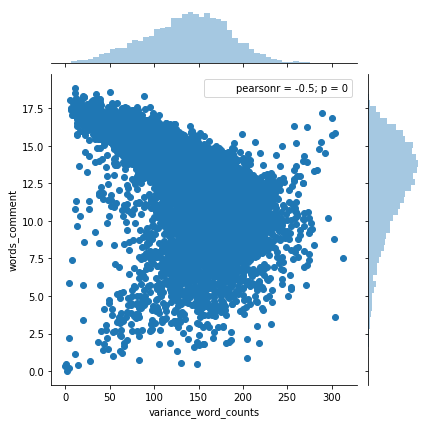

In [7]:
sns.jointplot(x='variance_word_counts',y='words_comment',data=dfaux)

In [8]:
# Group by label all relevant variables. Majority of them are related to mood
print(dfaux.groupby('label').agg({'http_comment': 'mean'}))
print(dfaux.groupby('label').agg({'points_comment': 'mean'}))
print(dfaux.groupby('label').agg({'question_comment': 'mean'}))
print(dfaux.groupby('label').agg({'exclamation_comment': 'mean'}))
print(dfaux.groupby('label').agg({'caret_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojiwink_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismile_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilep_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilepp_comment': 'mean'}))

       http_comment
label              
ENFJ       0.026632
ENFP       0.025230
ENTJ       0.026580
ENTP       0.024131
INFJ       0.032798
INFP       0.037713
INTJ       0.031798
INTP       0.035395
ISFJ       0.035301
ISFP       0.044170
ISTJ       0.030585
ISTP       0.040504
       points_comment
label                
ENFJ         0.372211
ENFP         0.357941
ENTJ         0.323333
ENTP         0.315518
INFJ         0.360865
INFP         0.338302
INTJ         0.315550
INTP         0.316293
ISFJ         0.330723
ISFP         0.298081
ISTJ         0.319171
ISTP         0.293501
       question_comment
label                  
ENFJ           0.110316
ENFP           0.118089
ENTJ           0.125152
ENTP           0.112102
INFJ           0.107801
INFP           0.104945
INTJ           0.112275
INTP           0.114881
ISFJ           0.101265
ISFP           0.109336
ISTJ           0.111415
ISTP           0.111958
       exclamation_comment
label                     
ENFJ              0.13

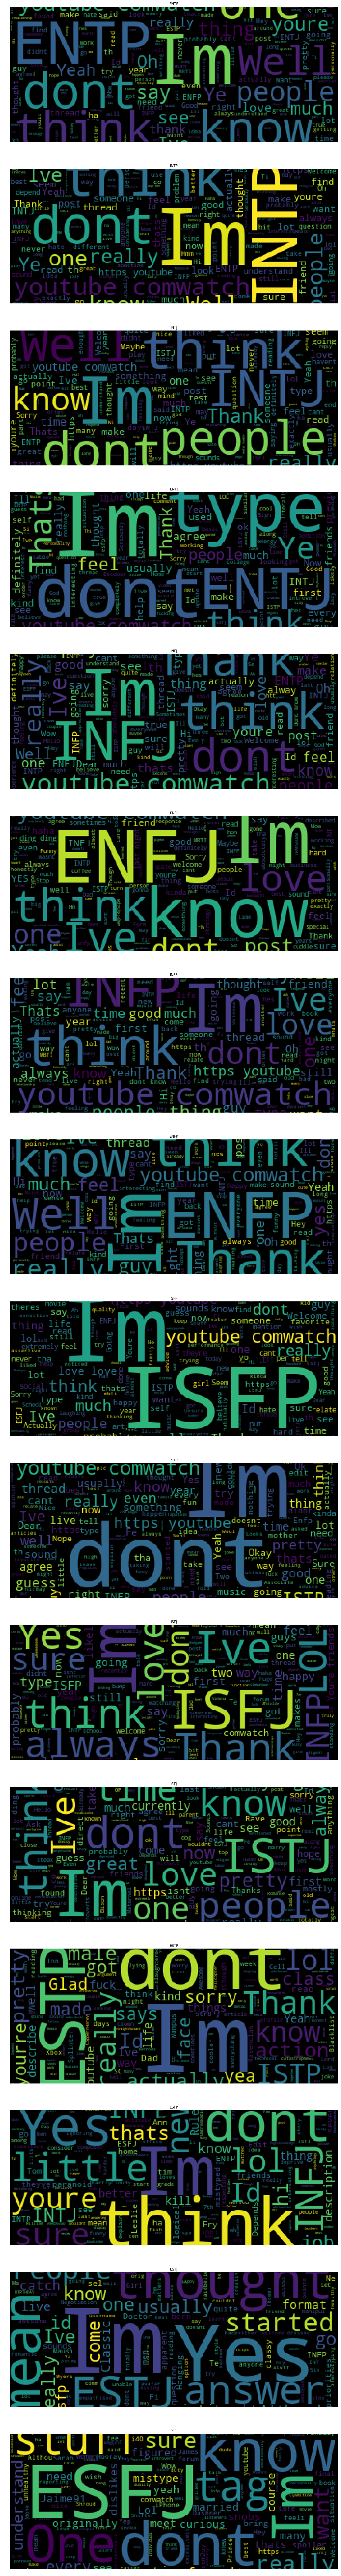

In [9]:
#Create wordcloud to guess which words are relevant for personality
import os
os.path
from PIL import Image
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
#Generate and paint graphics
fig, ax = plt.subplots(len(df['label'].unique()), sharex=True, figsize=(20,10*len(df['label'].unique())))

k = 0
for i in df['label'].unique():
    #Create new variable for printing all wordclouds
    dfaux2 = df[df['label'] == i]
    wordcloud = WordCloud().generate(dfaux2['text'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

In [10]:
#Vectorize
l_label = []
l_label = np.array(df.label)

l_text= []
l_text = np.array(df.text)

from sklearn.feature_extraction.text import CountVectorizer

cVectorizer = CountVectorizer()

X = cVectorizer.fit_transform(l_text)
y = l_label
print(X.shape)
print(y.shape)

(8672, 158343)
(8672,)


In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3,random_state=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [13]:
#Prediction and Evaluation
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        48
       ENFP       0.00      0.00      0.00       199
       ENTJ       0.00      0.00      0.00        71
       ENTP       0.61      0.07      0.12       210
       ESFJ       0.00      0.00      0.00        10
       ESFP       0.00      0.00      0.00        17
       ESTJ       0.00      0.00      0.00        14
       ESTP       0.00      0.00      0.00        30
       INFJ       0.54      0.60      0.57       418
       INFP       0.58      0.65      0.61       572
       INTJ       0.18      0.63      0.28       315
       INTP       0.61      0.58      0.59       404
       ISFJ       0.00      0.00      0.00        55
       ISFP       0.00      0.00      0.00        72
       ISTJ       0.00      0.00      0.00        62
       ISTP       0.00      0.00      0.00       105

avg / total       0.38      0.41      0.36      2602



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
#Print confusion matrix
print(confusion_matrix(y_test,predictions))

[[  0   0   0   1   0   0   0   0  13   9  22   3   0   0   0   0]
 [  0   0   0   1   0   0   0   0  24  44 117  13   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9  11  45   6   0   0   0   0]
 [  0   0   0  14   0   0   0   0  21  26 114  35   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   3   5   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  14   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   5   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6   2  17   5   0   0   0   0]
 [  0   0   0   6   0   0   0   0 252  48 101  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28 371 153  20   0   0   0   0]
 [  0   0   0   0   0   0   0   0  40  44 200  31   0   0   0   0]
 [  0   0   0   1   0   0   0   0  33  29 108 233   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9  11  32   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9  16  41   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7   8  41   6   0   0   0 

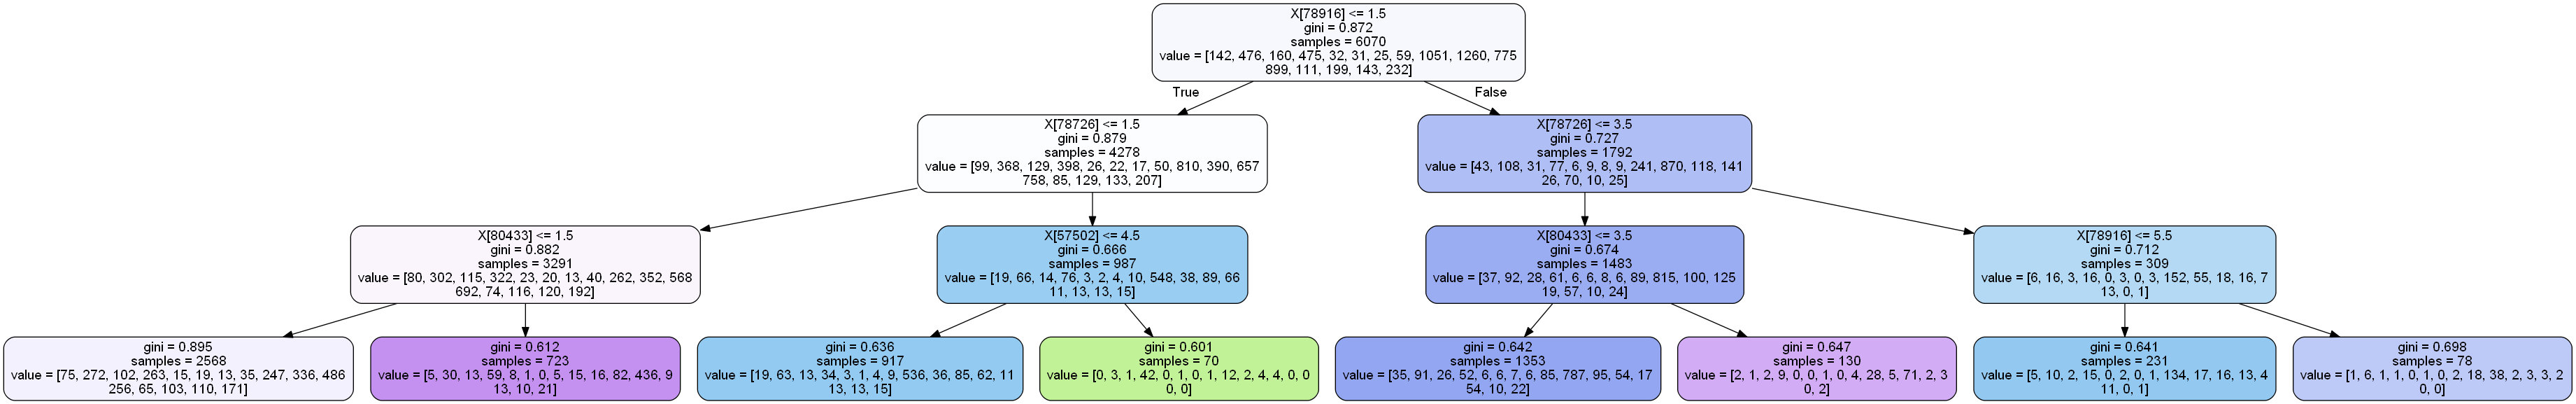

In [15]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

#Print big tree in low resolution
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [16]:
#Save Tree in pdf format
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("personality_decisionTree") 

'personality_decisionTree.pdf'

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
#Print confusion matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[  0   0   0   0   0   0   0   0  20  25   1   2   0   0   0   0]
 [  0  12   0   1   0   0   0   0  50 123   7   6   0   0   0   0]
 [  0   1   0   1   0   0   0   0  19  29   9  12   0   0   0   0]
 [  0   1   0  15   0   0   0   0  40  84  15  55   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   7   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   3  12   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   9   1   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9  15   3   3   0   0   0   0]
 [  0   0   0   1   0   0   0   0 222 174   6  15   0   0   0   0]
 [  0   2   0   0   0   0   0   0  47 501   5  17   0   0   0   0]
 [  0   1   0   0   0   0   0   0  68 121  81  44   0   0   0   0]
 [  0   0   0   0   0   0   0   0  46 137  10 211   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15  33   1   6   0   0   0   0]
 [  0   1   0   0   0   0   0   0  15  51   1   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11  34   4  13   0   0   0 

In [19]:
#Print Evaluation (classification report)
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        48
       ENFP       0.67      0.06      0.11       199
       ENTJ       0.00      0.00      0.00        71
       ENTP       0.79      0.07      0.13       210
       ESFJ       0.00      0.00      0.00        10
       ESFP       0.00      0.00      0.00        17
       ESTJ       0.00      0.00      0.00        14
       ESTP       0.00      0.00      0.00        30
       INFJ       0.38      0.53      0.44       418
       INFP       0.35      0.88      0.51       572
       INTJ       0.52      0.26      0.34       315
       INTP       0.52      0.52      0.52       404
       ISFJ       0.00      0.00      0.00        55
       ISFP       0.00      0.00      0.00        72
       ISTJ       0.00      0.00      0.00        62
       ISTP       0.00      0.00      0.00       105

avg / total       0.40      0.40      0.32      2602



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
